# Imports

In [1]:
# Data processing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Deep learning libraries

import keras
import tensorflow as tf
import tensorflow_hub as hub
import PIL.Image as Image

# Analysis libraries

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Utils libraries

import kagglehub
import time
import random
import datetime

# Google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data management

Found 26179 files belonging to 10 classes.
Using 23562 files for training.
Found 26179 files belonging to 10 classes.
Using 2617 files for validation.
Training classes => ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Testing classes => ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Shape of the training set images => (64, 224, 224, 3)
Shape of the training set labels => (64,)
Shape of the testing set images => (64, 224, 224, 3)
Shape of the testing set labels => (64,)
['cane' 'cavallo' 'elefante' 'farfalla' 'gallina' 'gatto' 'mucca' 'pecora'
 'ragno' 'scoiattolo']


<Figure size 1000x1000 with 0 Axes>

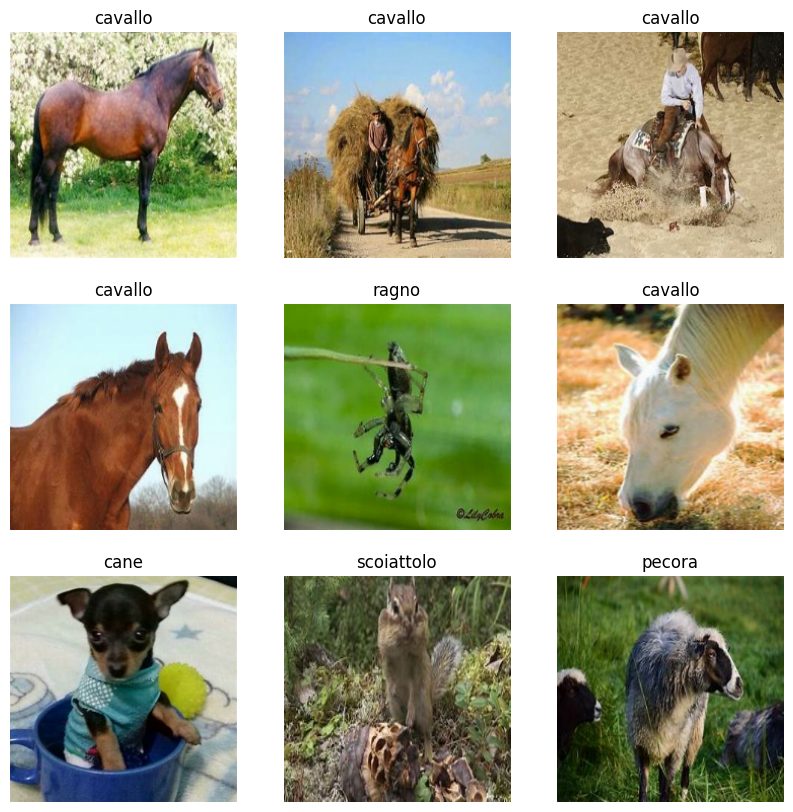

In [65]:
# Download latest version
path = kagglehub.dataset_download("alessiocorrado99/animals10")
DATASET_URI= path + "/raw-img"

# Determine the unique seed for our data

random.seed(10)
seed = random.randint(1, 200)

# Determine the image and batch sizes

batch_size = 64

img_height = 224
img_width = 224
image_size = (img_height, img_width)

# Determine the validation split (ie. 90% train, 10% test for ex.)
validation_split = 0.1 # Split of 20%

train_ds = keras.utils.image_dataset_from_directory(
    directory=DATASET_URI,
    validation_split=validation_split,
    subset="training",  # Use 'training' subset
    seed=seed,
    image_size=image_size,
    batch_size=batch_size,
)

test_ds = keras.utils.image_dataset_from_directory(
  directory = DATASET_URI,
  validation_split = validation_split,
  subset = "validation",
  seed = seed,
  image_size = image_size,
  batch_size = batch_size,
)

print(f"Training classes => {train_ds.class_names}")
print(f"Testing classes => {test_ds.class_names}")

# italian_to_english = {
#     'cane': 'dog',
#     'cavallo': 'horse',
#     'elefante': 'elephant',
#     'farfalla': 'butterfly',
#     'gallina': 'chicken',
#     'gatto': 'cat',
#     'mucca': 'cow',
#     'pecora': 'sheep',
#     'ragno': 'spider',
#     'scoiattolo': 'squirrel'
# }

# class_names = np.array([italian_to_english[name] for name in test_ds.class_names])

# Print a summary of the image classes with an image of each class.
# We will extract 1 image of the training set.


# for images, labels in test_ds.take(1):
#   for i in range(len(class_names) - 1):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

# Print the shapes of the training and the testing dataset
for image_batch, labels_batch in train_ds:
    print(f"Shape of the training set images => {image_batch.shape}")
    print(f"Shape of the training set labels => {labels_batch.shape}")
    break

for image_batch, labels_batch in test_ds:
    print(f"Shape of the testing set images => {image_batch.shape}")
    print(f"Shape of the testing set labels => {labels_batch.shape}")
    break

plt.figure(figsize=(10, 10))
class_names = test_ds.class_names
class_names = np.array(class_names)
num_classes = len(class_names)

print(class_names)

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(len(class_names) - 1):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Normalizing the data
normalization_layer = keras.layers.Rescaling(1./255)
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# Auto-tuning our data
# AUTOTUNE = tf.data.AUTOTUNE
# test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Model JJ_1

In [91]:
# Import
m1 = keras.models.load_model("/content/drive/MyDrive/AI Engineering/Projects/CNN - Image Classification/m1_JJ.keras")

# Predict
m1_predicted_batch = m1.predict(test_ds)
m1_predicted_id = tf.math.argmax(m1_predicted_batch, axis=-1)
m1_predicted_label_batch = class_names[m1_predicted_id.numpy()]

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


## Image visualisation

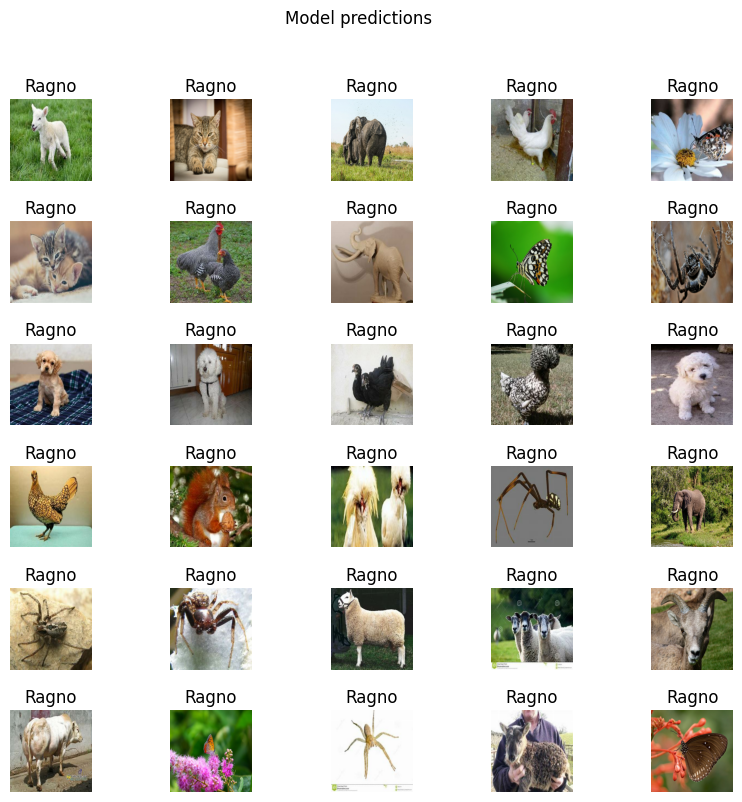

In [93]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n].numpy().astype('uint8'))
  plt.title(m1_predicted_label_batch[n].title())
  plt.axis('off')
_ = plt.suptitle("Model predictions")

## Confusion Matrix

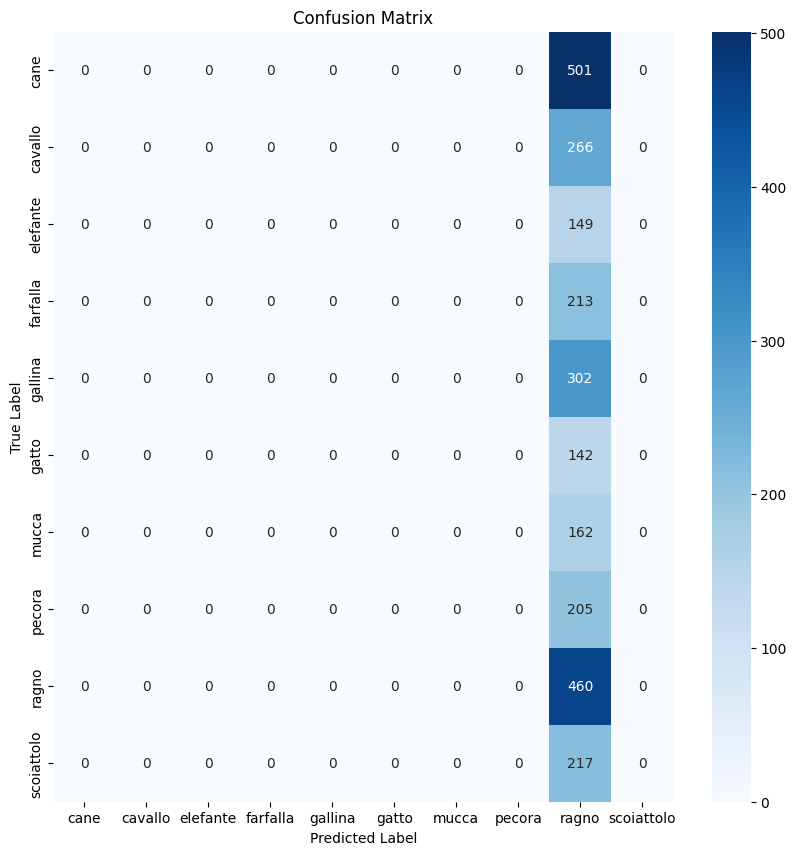

In [69]:
# Get true labels
true_labels = []
for images, labels in test_ds:
  true_labels.extend(labels.numpy())

# Calculate confusion matrix
cm = confusion_matrix(true_labels, m1_predicted_id)

# Display confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Classification Report

In [70]:
# Generate classification report
report = classification_report(true_labels, m1_predicted_id, target_names=class_names)
print(report)

              precision    recall  f1-score   support

        cane       0.00      0.00      0.00       501
     cavallo       0.00      0.00      0.00       266
    elefante       0.00      0.00      0.00       149
    farfalla       0.00      0.00      0.00       213
     gallina       0.00      0.00      0.00       302
       gatto       0.00      0.00      0.00       142
       mucca       0.00      0.00      0.00       162
      pecora       0.00      0.00      0.00       205
       ragno       0.18      1.00      0.30       460
  scoiattolo       0.00      0.00      0.00       217

    accuracy                           0.18      2617
   macro avg       0.02      0.10      0.03      2617
weighted avg       0.03      0.18      0.05      2617



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model Evaluation

In [71]:
loss, accuracy = m1.evaluate(test_ds)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.1807 - loss: 8.8964
Test Loss: 8.87675666809082
Test Accuracy: 0.17577378451824188


# Model JJ_2

In [4]:
# Import
m2 = keras.models.load_model("/content/drive/MyDrive/AI Engineering/Projects/CNN - Image Classification/m2_JJ.keras")

# Predict
m2_predicted_batch = m2.predict(test_ds)
m2_predicted_id = tf.math.argmax(m2_predicted_batch, axis=-1)
m2_predicted_label_batch = class_names[m2_predicted_id]

82/82 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step


## Image visualisation

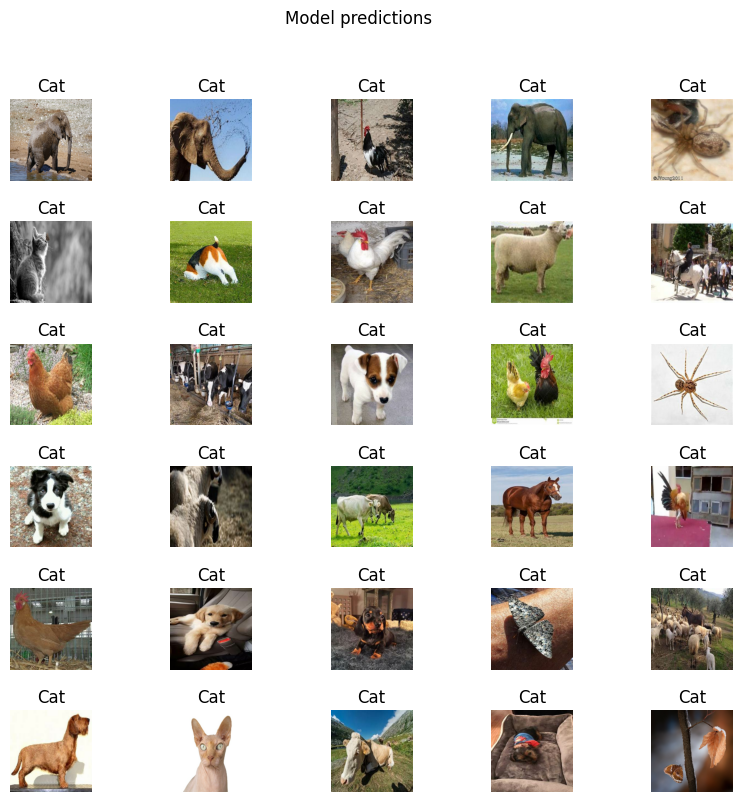

In [5]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(m2_predicted_label_batch[n].title())
  plt.axis('off')
_ = plt.suptitle("Model predictions")

## Confusion Matrix

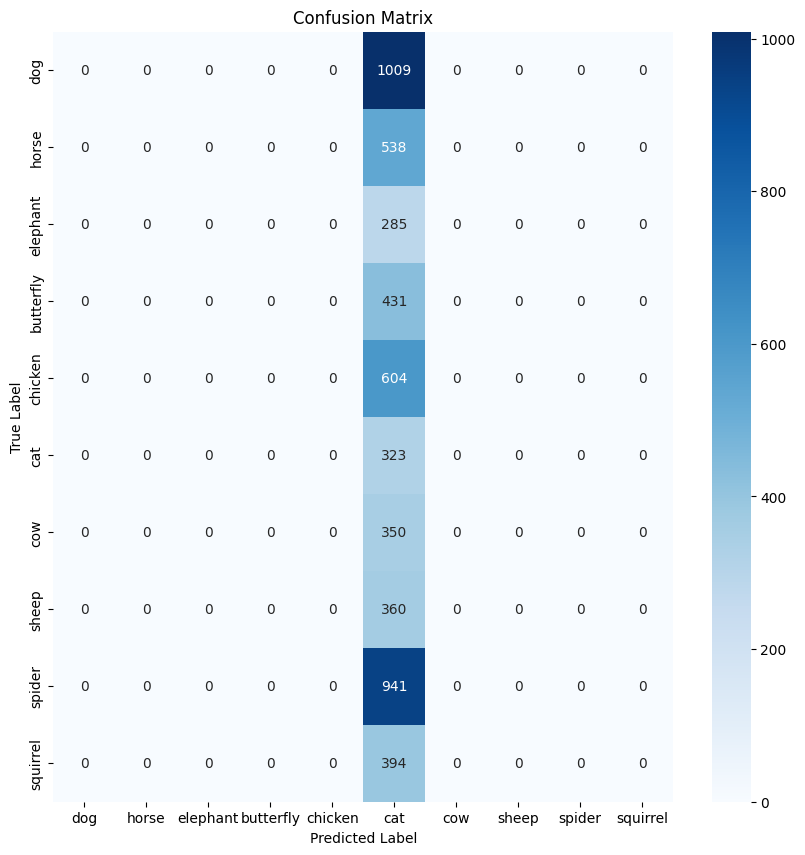

In [7]:
# Get true labels
true_labels = []
for images, labels in test_ds:
  true_labels.extend(labels.numpy())

# Calculate confusion matrix
cm = confusion_matrix(true_labels, m2_predicted_id)

# Display confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Classification Report

In [8]:
# Generate classification report
report = classification_report(true_labels, m2_predicted_id, target_names=class_names)
print(report)

              precision    recall  f1-score   support

         dog       0.00      0.00      0.00      1009
       horse       0.00      0.00      0.00       538
    elephant       0.00      0.00      0.00       285
   butterfly       0.00      0.00      0.00       431
     chicken       0.00      0.00      0.00       604
         cat       0.06      1.00      0.12       323
         cow       0.00      0.00      0.00       350
       sheep       0.00      0.00      0.00       360
      spider       0.00      0.00      0.00       941
    squirrel       0.00      0.00      0.00       394

    accuracy                           0.06      5235
   macro avg       0.01      0.10      0.01      5235
weighted avg       0.00      0.06      0.01      5235



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model Evaluation

In [9]:
test_loss, test_acc = m2.evaluate(test_ds, verbose=1)
print('Test loss Model 2 => ', test_loss)
print('Test accuracy Model 2 => ', test_acc)

82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.0703 - loss: 4.7981
Test loss Model 2 =>  4.850738048553467
Test accuracy Model 2 =>  0.06170009449124336


# Model JJ_3

In [10]:
# Import
m3 = keras.models.load_model("/content/drive/MyDrive/AI Engineering/Projects/CNN - Image Classification/m3_JJ.keras")

# Predict
m3_predicted_batch = m3.predict(test_ds)
m3_predicted_id = tf.math.argmax(m3_predicted_batch, axis=-1)
m3_predicted_label_batch = class_names[m3_predicted_id]

82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step


## Image visualisation

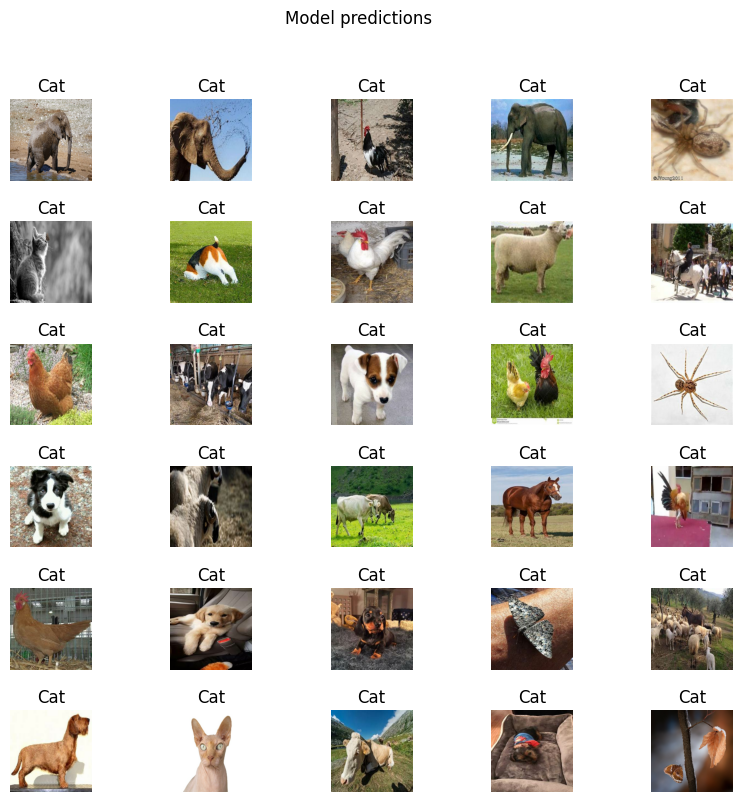

In [11]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(m3_predicted_label_batch[n].title())
  plt.axis('off')
_ = plt.suptitle("Model predictions")

## Confusion Matrix

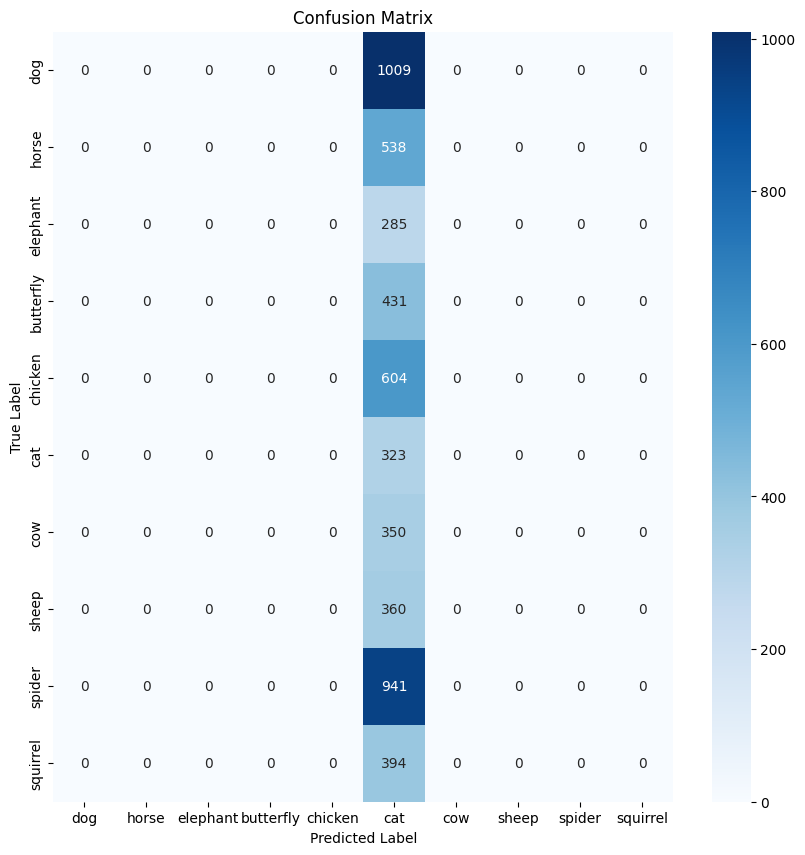

In [12]:
# Get true labels
true_labels = []
for images, labels in test_ds:
  true_labels.extend(labels.numpy())

# Calculate confusion matrix
cm = confusion_matrix(true_labels, m3_predicted_id)

# Display confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Classification Report

In [13]:
# Generate classification report
report = classification_report(true_labels, m3_predicted_id, target_names=class_names)
print(report)

              precision    recall  f1-score   support

         dog       0.00      0.00      0.00      1009
       horse       0.00      0.00      0.00       538
    elephant       0.00      0.00      0.00       285
   butterfly       0.00      0.00      0.00       431
     chicken       0.00      0.00      0.00       604
         cat       0.06      1.00      0.12       323
         cow       0.00      0.00      0.00       350
       sheep       0.00      0.00      0.00       360
      spider       0.00      0.00      0.00       941
    squirrel       0.00      0.00      0.00       394

    accuracy                           0.06      5235
   macro avg       0.01      0.10      0.01      5235
weighted avg       0.00      0.06      0.01      5235



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model Evaluation

In [14]:
test_loss, test_acc = m3.evaluate(test_ds, verbose=1)
print('Test loss Model 3 => ', test_loss)
print('Test accuracy Model 3 => ', test_acc)

82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.0703 - loss: 4.7861
Test loss Model 3 =>  4.830059051513672
Test accuracy Model 3 =>  0.06170009449124336


# Model JJ_4

In [15]:
# Import
m4 = keras.models.load_model("/content/drive/MyDrive/AI Engineering/Projects/CNN - Image Classification/m4_JJ.keras")

# Predict
m4_predicted_batch = m4.predict(test_ds)
m4_predicted_id = tf.math.argmax(m4_predicted_batch, axis=-1)
m4_predicted_label_batch = class_names[m4_predicted_id]

82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step


## Image visualisation

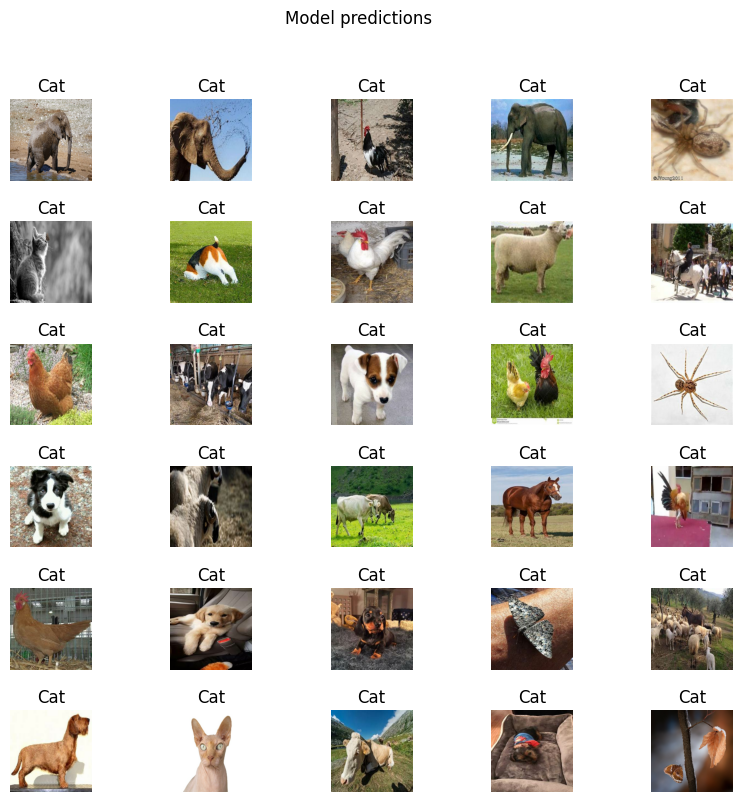

In [16]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(m4_predicted_label_batch[n].title())
  plt.axis('off')
_ = plt.suptitle("Model predictions")

## Confusion Matrix

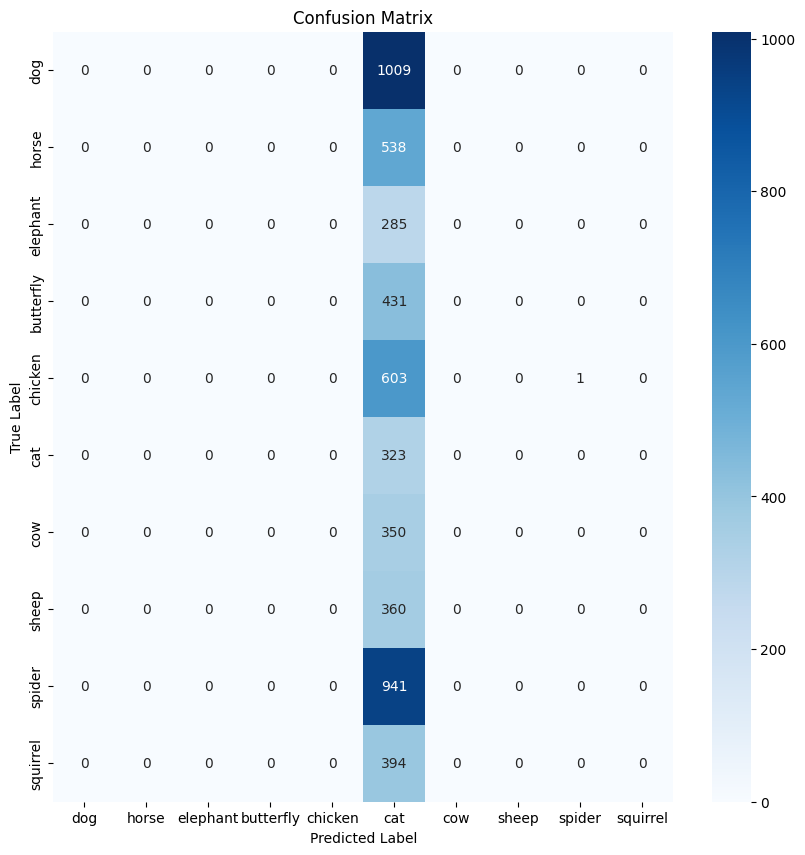

In [17]:
# Get true labels
true_labels = []
for images, labels in test_ds:
  true_labels.extend(labels.numpy())

# Calculate confusion matrix
cm = confusion_matrix(true_labels, m4_predicted_id)

# Display confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Classification Report

In [18]:
# Generate classification report
report = classification_report(true_labels, m4_predicted_id, target_names=class_names)
print(report)

              precision    recall  f1-score   support

         dog       0.00      0.00      0.00      1009
       horse       0.00      0.00      0.00       538
    elephant       0.00      0.00      0.00       285
   butterfly       0.00      0.00      0.00       431
     chicken       0.00      0.00      0.00       604
         cat       0.06      1.00      0.12       323
         cow       0.00      0.00      0.00       350
       sheep       0.00      0.00      0.00       360
      spider       0.00      0.00      0.00       941
    squirrel       0.00      0.00      0.00       394

    accuracy                           0.06      5235
   macro avg       0.01      0.10      0.01      5235
weighted avg       0.00      0.06      0.01      5235



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model Evaluation

In [19]:
test_loss, test_acc = m4.evaluate(test_ds, verbose=1)
print('Test loss Model 4 => ', test_loss)
print('Test accuracy Model 4 => ', test_acc)

82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.0703 - loss: 4.5492
Test loss Model 4 =>  4.579535007476807
Test accuracy Model 4 =>  0.06170009449124336


# Model JJ_5

In [32]:
# Import
m5 = keras.models.load_model("/content/drive/MyDrive/AI Engineering/Projects/CNN - Image Classification/m5_JJ.keras")

# Predict
m5_predicted_batch = m5.predict(test_ds)
m5_predicted_id = tf.math.argmax(m5_predicted_batch, axis=-1)
m5_predicted_label_batch = class_names[m5_predicted_id]

82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step


TypeError: only integer scalar arrays can be converted to a scalar index

## Image visualisation

NameError: name 'm5_predicted_label_batch' is not defined

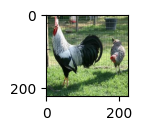

In [31]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(m5_predicted_label_batch[n].title())
  plt.axis('off')
_ = plt.suptitle("Model predictions")

## Confusion Matrix

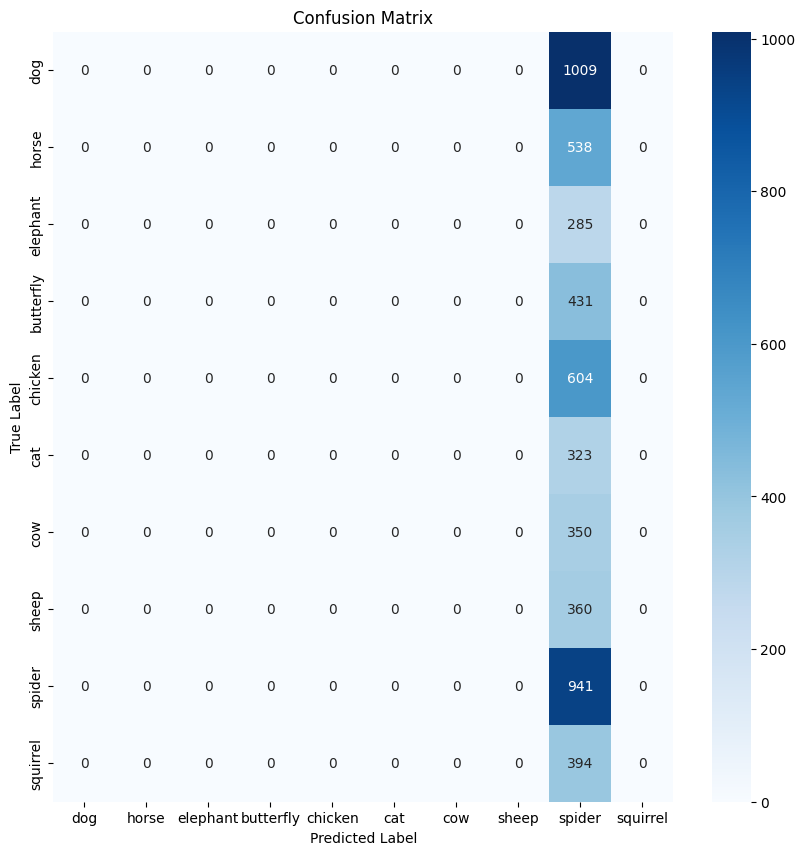

In [23]:
# Get true labels
true_labels = []
for images, labels in test_ds:
  true_labels.extend(labels.numpy())

# Calculate confusion matrix
cm = confusion_matrix(true_labels, m5_predicted_id)

# Display confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Classification Report

In [24]:
# Generate classification report
report = classification_report(true_labels, m5_predicted_id, target_names=class_names)
print(report)

              precision    recall  f1-score   support

         dog       0.00      0.00      0.00      1009
       horse       0.00      0.00      0.00       538
    elephant       0.00      0.00      0.00       285
   butterfly       0.00      0.00      0.00       431
     chicken       0.00      0.00      0.00       604
         cat       0.00      0.00      0.00       323
         cow       0.00      0.00      0.00       350
       sheep       0.00      0.00      0.00       360
      spider       0.18      1.00      0.30       941
    squirrel       0.00      0.00      0.00       394

    accuracy                           0.18      5235
   macro avg       0.02      0.10      0.03      5235
weighted avg       0.03      0.18      0.05      5235



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model Evaluation

In [25]:
test_loss, test_acc = m5.evaluate(test_ds, verbose=1)
print('Test loss Model 5 => ', test_loss)
print('Test accuracy Model 5 => ', test_acc)

82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.1795 - loss: 5.3537
Test loss Model 5 =>  5.388761043548584
Test accuracy Model 5 =>  0.1797516644001007


# Model JJ_TFH

In [29]:
import tensorflow_hub as hub

# Import
tfh = keras.models.load_model("/content/drive/MyDrive/AI Engineering/Projects/CNN - Image Classification/feature_model_JJ_v2.keras", compile=False, safe_mode=False)

# Predict
tfh_predicted_batch = tfh.predict(test_ds)
tfh_predicted_id = tf.math.argmax(tfh_predicted_batch, axis=-1)
tfh_predicted_label_batch = class_names[tfh_predicted_id]

NameError: Exception encountered when calling Lambda.call().

[1mname 'hub' is not defined[0m

Arguments received by Lambda.call():
  • inputs=tf.Tensor(shape=(64, 224, 224, 3), dtype=float32)
  • mask=None
  • training=False

## Image visualisation

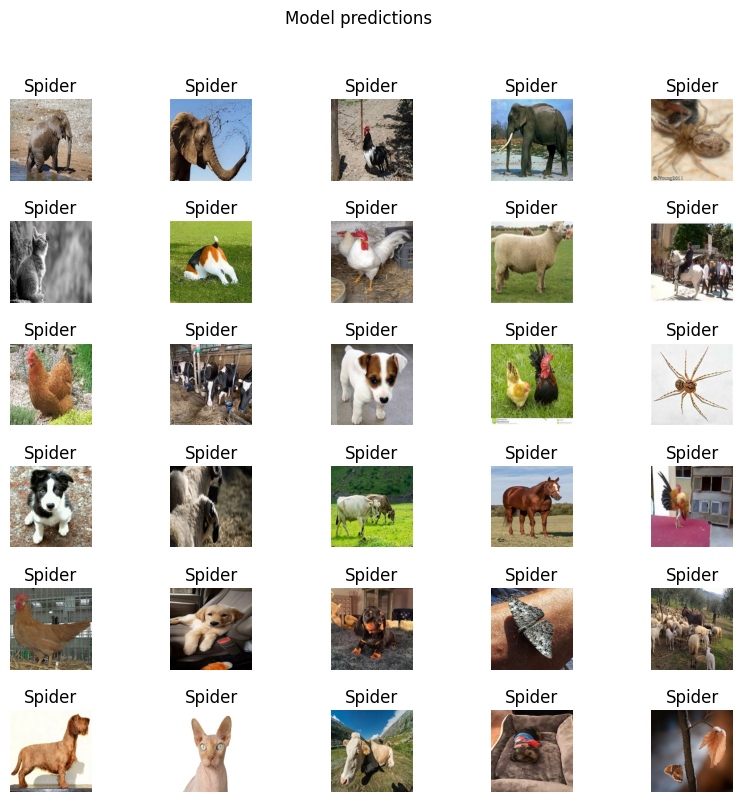

In [ ]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(m1_predicted_label_batch[n].title())
  plt.axis('off')
_ = plt.suptitle("Model predictions")

## Confusion Matrix

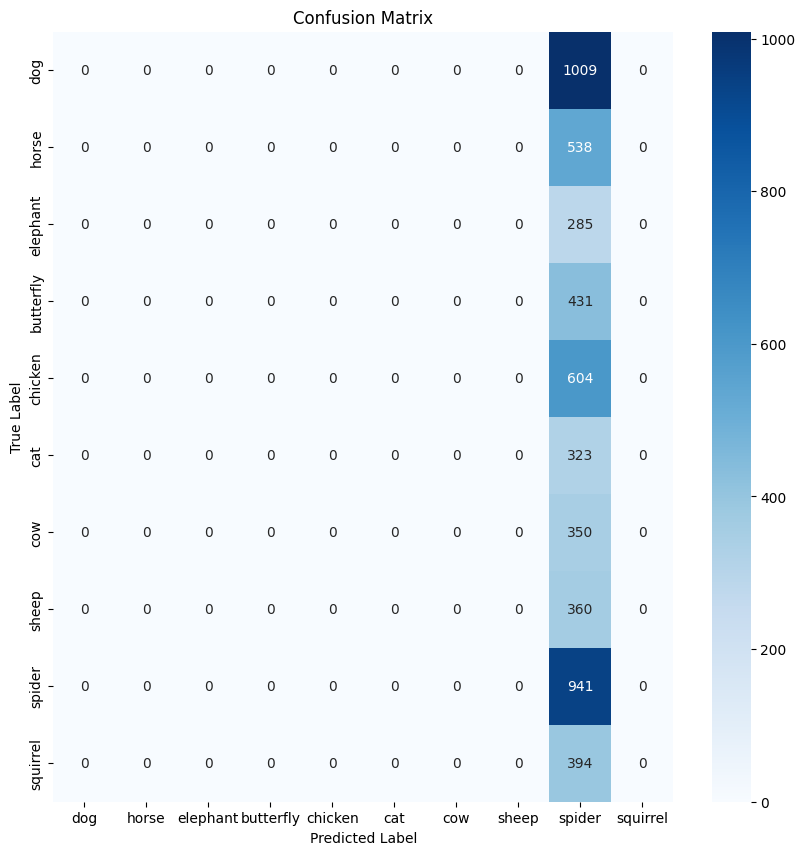

In [ ]:
# Get true labels
true_labels = []
for images, labels in test_ds:
  true_labels.extend(labels.numpy())

# Calculate confusion matrix
cm = confusion_matrix(true_labels, m1_predicted_id)

# Display confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Classification Report

In [ ]:
# Generate classification report
report = classification_report(true_labels, m1_predicted_id, target_names=class_names)
print(report)

              precision    recall  f1-score   support

         dog       0.00      0.00      0.00      1009
       horse       0.00      0.00      0.00       538
    elephant       0.00      0.00      0.00       285
   butterfly       0.00      0.00      0.00       431
     chicken       0.00      0.00      0.00       604
         cat       0.00      0.00      0.00       323
         cow       0.00      0.00      0.00       350
       sheep       0.00      0.00      0.00       360
      spider       0.18      1.00      0.30       941
    squirrel       0.00      0.00      0.00       394

    accuracy                           0.18      5235
   macro avg       0.02      0.10      0.03      5235
weighted avg       0.03      0.18      0.05      5235



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model Evaluation

In [ ]:
test_loss, test_acc = m1.evaluate(test_ds, verbose=1)
print('Test loss Model 1 => ', test_loss)
print('Test accuracy Model 1 => ', test_acc)

82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1799 - loss: 8.6508
Test loss Model 1 =>  8.738760948181152
Test accuracy Model 1 =>  0.1797516644001007
